In [1]:
import sys
sys.path.append( '../relative_fitness_mechanisms/' )
import plot_utils
import relative_fitness_gp

In [2]:
import jax
from jax import jit, lax
from functools import partial
import jax.numpy as jnp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import evofr as ef

In [3]:
raw_seq = pd.read_csv("../../evofr/test/testing_data/mlr-variant-counts.tsv", sep="\t")
raw_seq = raw_seq[raw_seq.location == "City0"]

In [4]:
var_freq = ef.VariantFrequencies(raw_seq, pivot="C")

In [5]:
from evofr.plotting import FrequencyPlot, GrowthAdvantagePlot, TimeVaryingPlot

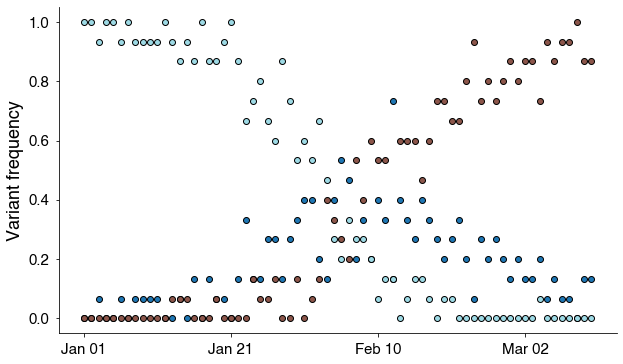

In [6]:
FrequencyPlot(data=var_freq).plot(posterior=False)

In [7]:
from relative_fitness_gp import SquaredExpCov, RelativeFitnessGP

In [22]:
kernel = SquaredExpCov(0.3, 100.)
model = RelativeFitnessGP(gp=kernel, tau=4.2)
inference_method = ef.InferMAP(iters=50_000, lr=4e-4)
inference_method = ef.InferNUTS(num_samples=2000, num_warmup=100)


In [23]:
posterior = inference_method.fit(model, var_freq)

sample: 100%|█| 2100/2100 [00:13<00:00, 159.89it/s, 255 steps of size 9.17e-03. acc.


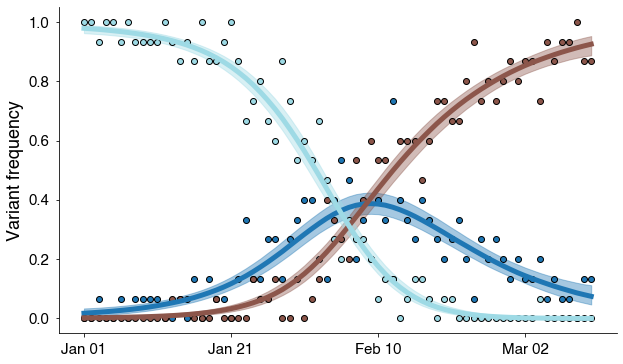

In [24]:
FrequencyPlot(posterior).plot()

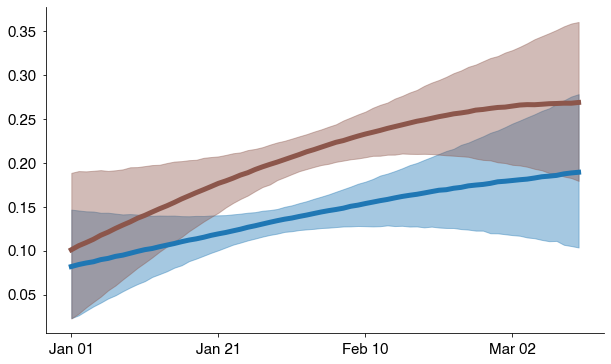

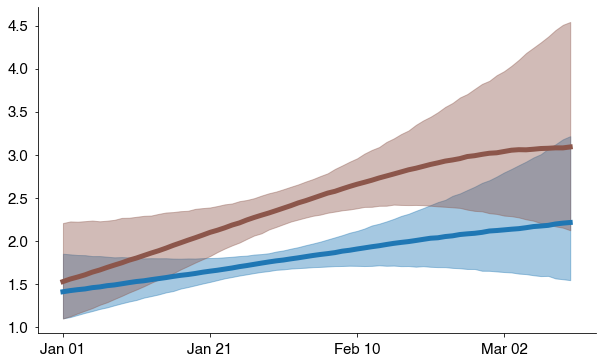

In [25]:
TimeVaryingPlot(posterior=posterior, site="delta").plot()
TimeVaryingPlot(posterior=posterior, site="ga").plot()

In [26]:
plt.hist(posterior.samples["alpha"])

KeyError: 'alpha'

In [27]:
posterior.samples

{'_delta': DeviceArray([[[ 0.02160138,  0.02435648,  0.02577119, ...,  0.21487896,
                 0.21357018,  0.21717656],
               [ 0.11570393,  0.11553232,  0.12082124, ...,  0.3040588 ,
                 0.29956168,  0.3045872 ]],
 
              [[-0.02440078, -0.01062031, -0.00775487, ...,  0.21166901,
                 0.21726087,  0.21555449],
               [ 0.08497633,  0.08594394,  0.08799319, ...,  0.3097943 ,
                 0.31679967,  0.3127586 ]],
 
              [[ 0.0197135 ,  0.02322831,  0.02968901, ...,  0.21579587,
                 0.21769412,  0.22172368],
               [ 0.07734318,  0.081271  ,  0.08511216, ...,  0.29512012,
                 0.29442433,  0.29208416]],
 
              ...,
 
              [[ 0.05836862,  0.06353616,  0.06695358, ...,  0.21594423,
                 0.22063029,  0.21431121],
               [ 0.128507  ,  0.13656333,  0.1379021 , ...,  0.29430145,
                 0.2922128 ,  0.29611757]],
 
              [[ 0.05889503, 